<a href="https://colab.research.google.com/github/Gehlen05/Aprendizado-Maquina/blob/main/Fuzzy_respirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_excel('Respira_DB_Treinamento.xlsx')
df.head()




In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
NIF = ctrl.Antecedent(np.arange(0, 61, 5), 'NIF')
RSBI = ctrl.Antecedent(np.arange(0, 301, 10), 'RSBI')
Action = ctrl.Consequent(np.arange(0, 1.05, .05), 'Action')

# Auto-membership function population is possible with .automf(3, 5, or 7)
#NIF.automf(3)
#RSBI.automf(3)

NIF['low'] = fuzz.trimf(NIF.universe, [0, 0, 25])
NIF['medium'] = fuzz.trimf(NIF.universe, [0, 25, 60])
NIF['high'] = fuzz.trimf(NIF.universe, [25, 60, 60])

RSBI['low'] = fuzz.trimf(RSBI.universe, [0, 0, 104])
RSBI['medium'] = fuzz.trimf(RSBI.universe, [0, 105, 300])
RSBI['high'] = fuzz.trimf(RSBI.universe, [105, 300, 300])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
Action['low'] = fuzz.trimf(Action.universe, [0, 0, 0.5])
Action['medium'] = fuzz.trimf(Action.universe, [0, 0.5, 1])
Action['high'] = fuzz.trimf(Action.universe, [0.5, 1, 1])

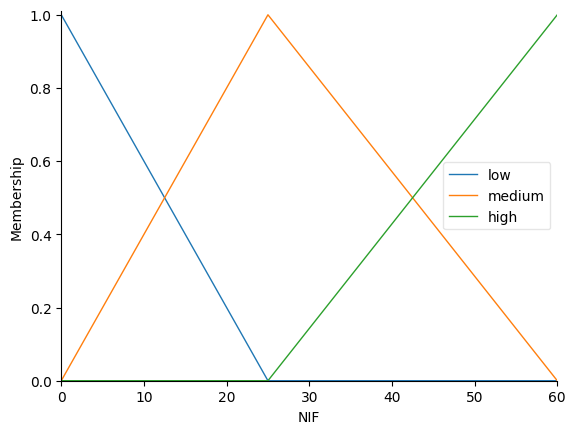

In [ ]:
# You can see how these look with .view()
NIF.view()

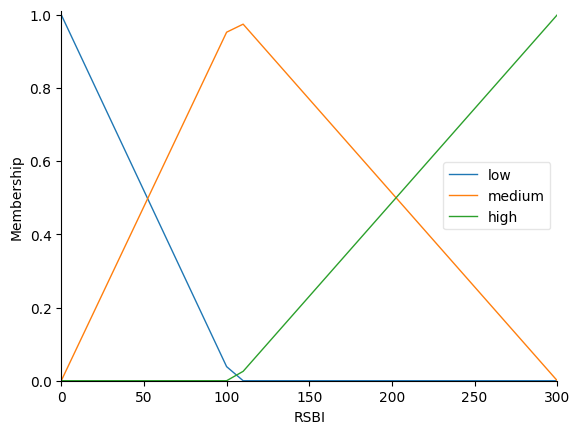

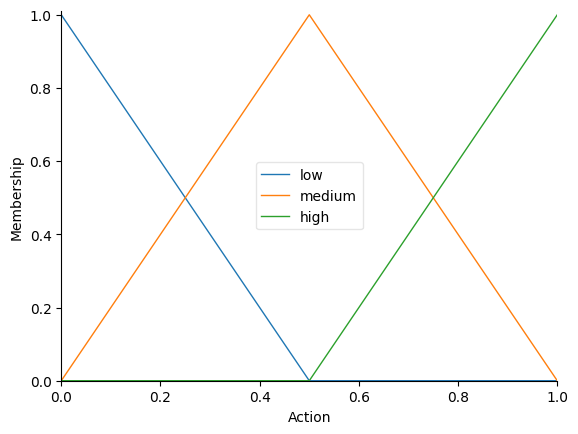

In [ ]:
RSBI.view()
Action.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

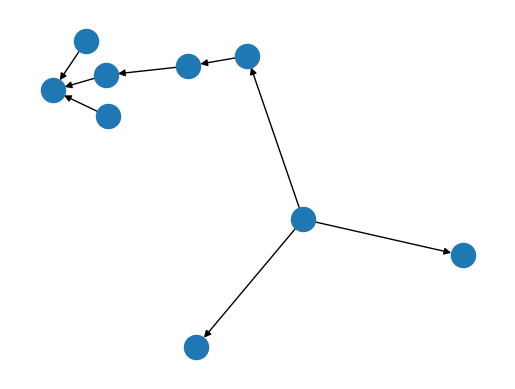

In [ ]:
rule1 = ctrl.Rule(NIF['low'], Action['low'])
rule2 = ctrl.Rule(NIF['high'], Action['high'])
rule3 = ctrl.Rule(RSBI['low'], Action['high'])
rule4 = ctrl.Rule(RSBI['high'], Action['low'])
#rule5 = ctrl.Rule(NIF['medium'] & RSBI['high'], Action['low'])
#rule6 = ctrl.Rule(NIF['medium'] & RSBI['low'], Action['high'])


rule1.view()


0.691802134241538
0.8199089557785212
0.48365769070838643
0.2653649558491488
0.43296814934845623
0.5499890913986513
0.314845980730023
0.8333333333333335
0.19352818724349558
0.22968992911140007
0.20416666666666664
0.5787856211585026
0.8307848315292232
0.19261261261261262
0.17095072782331927
0.8212669683257918
0.8158175554079676
0.826110899138356
0.8170368364030336
0.7852731555195929
0.7606542327019714
0.8077870078898037


/usr/local/lib/python3.10/dist-packages/skfuzzy/control/visualization.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig, self.ax = plt.subplots()


0.5197184357210249
0.33964847995594993
0.7803869156144262
0.8187436676798379
0.804813466770323
0.8251838055015107
0.8081069697144799
0.830357142857143


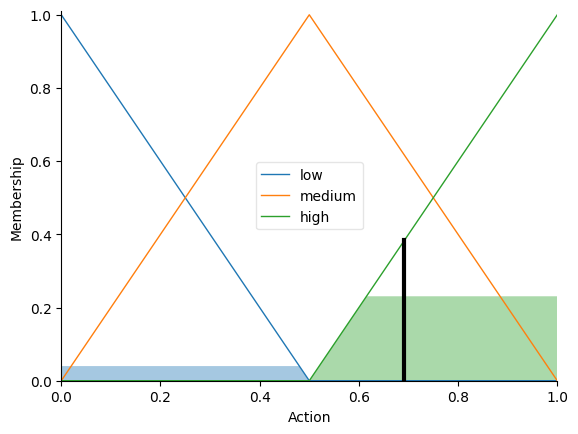

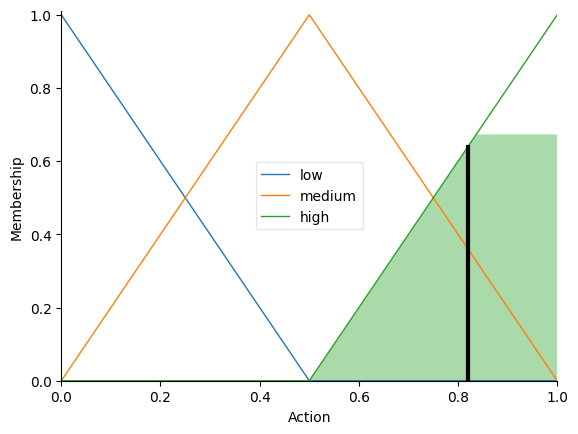

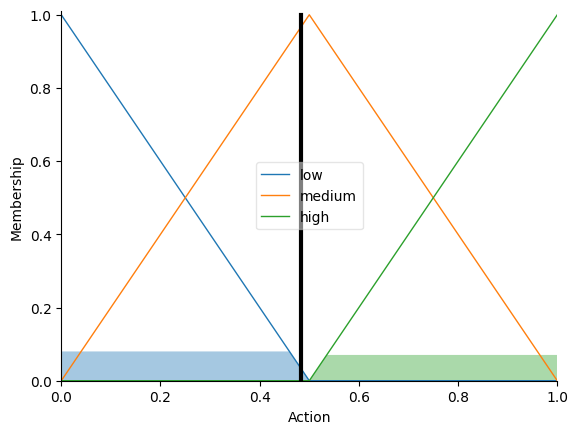

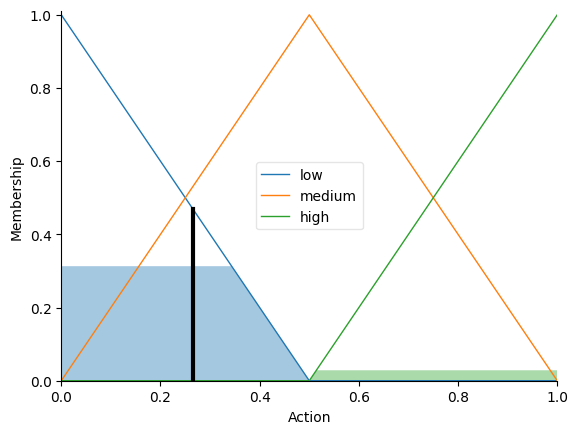

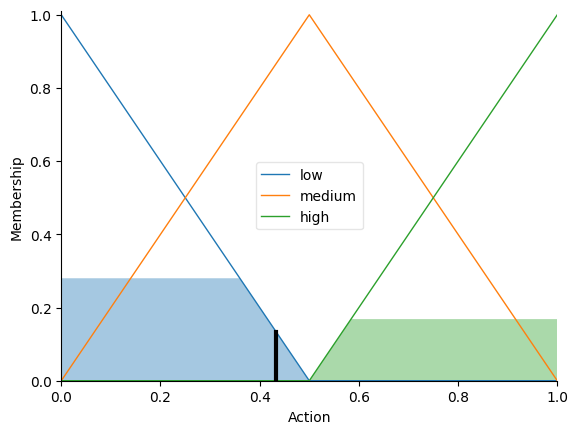

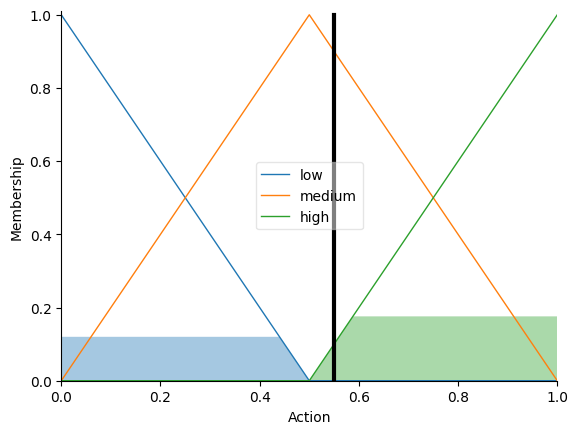

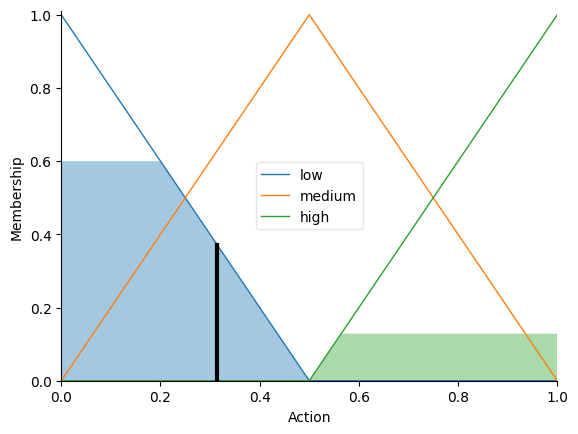

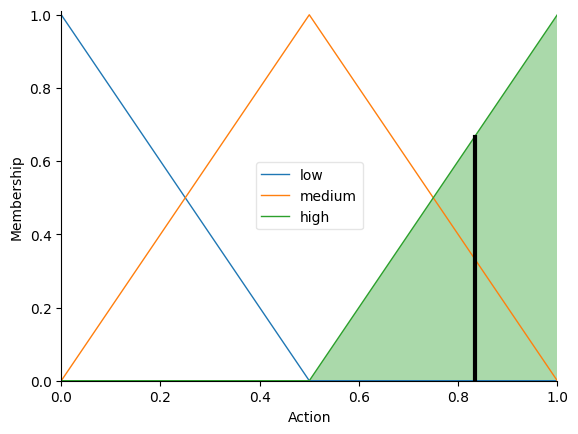

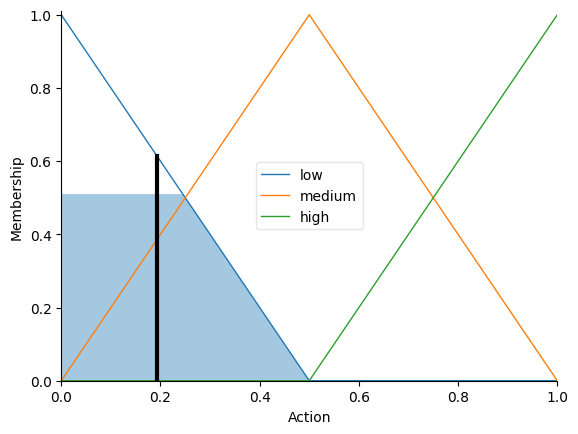

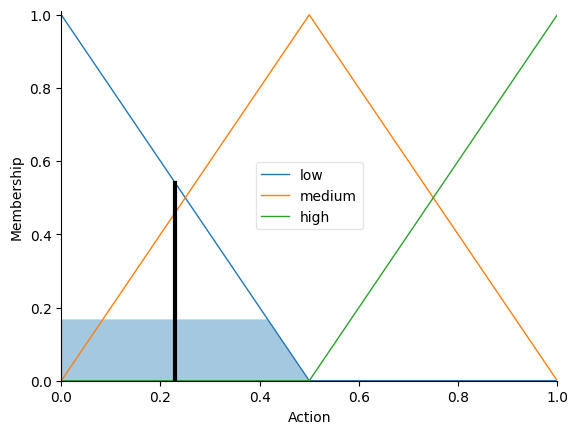

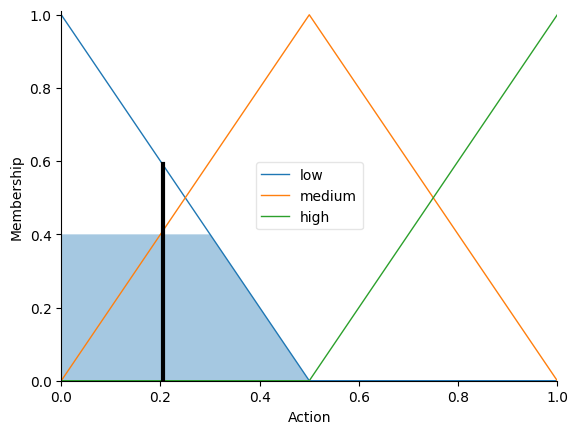

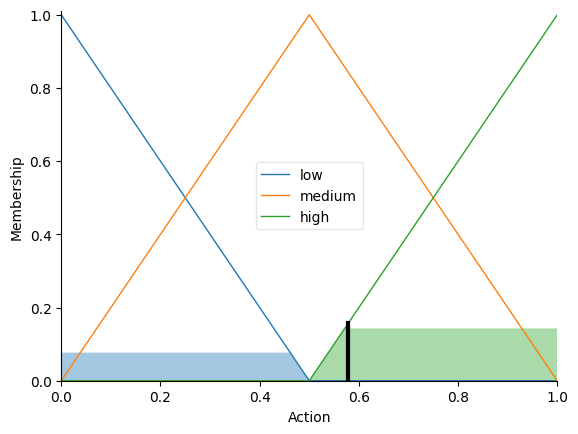

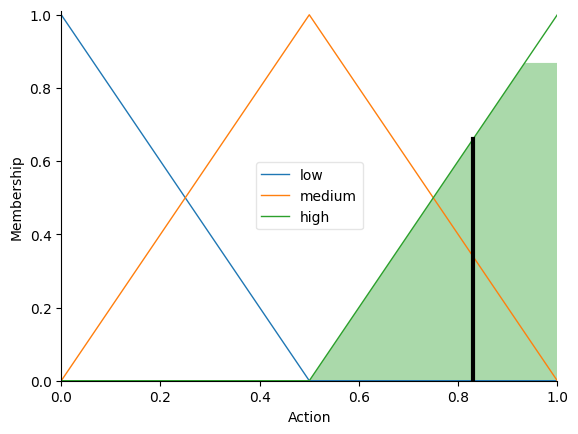

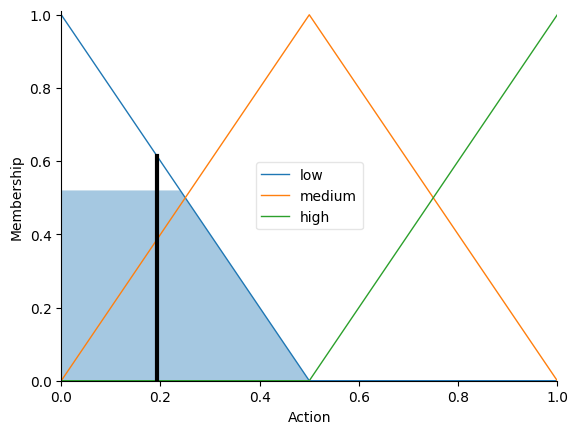

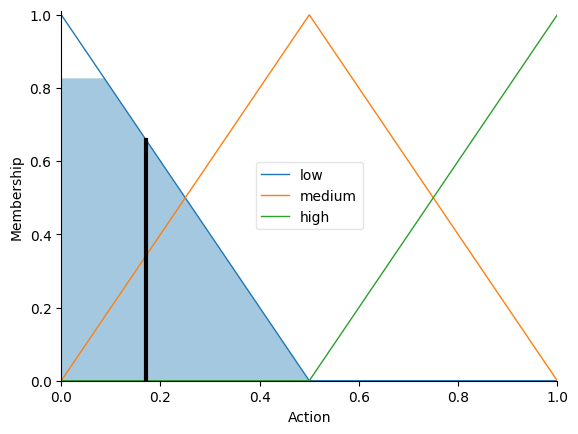

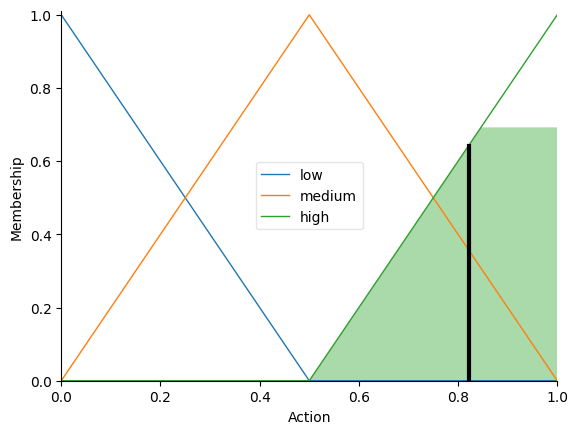

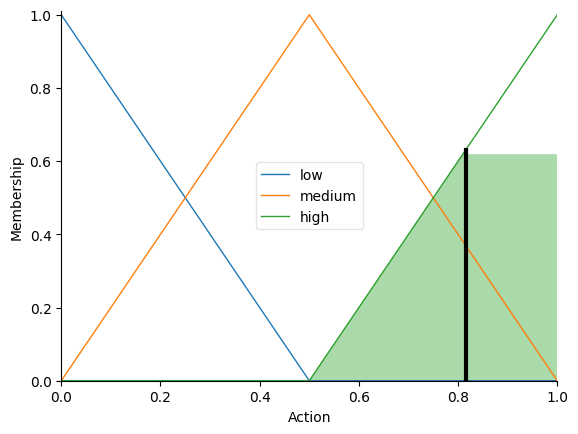

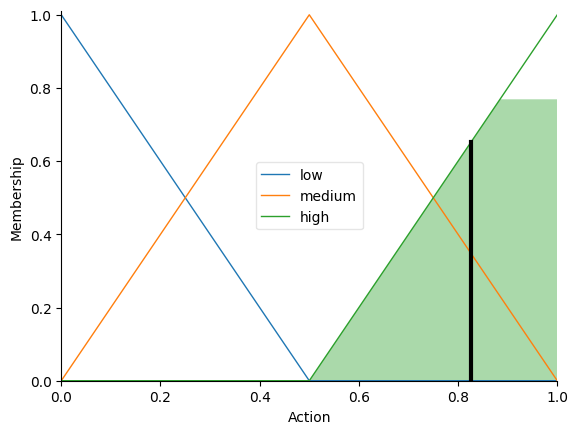

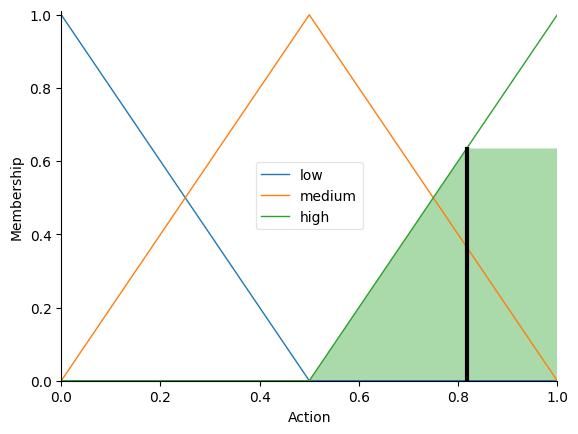

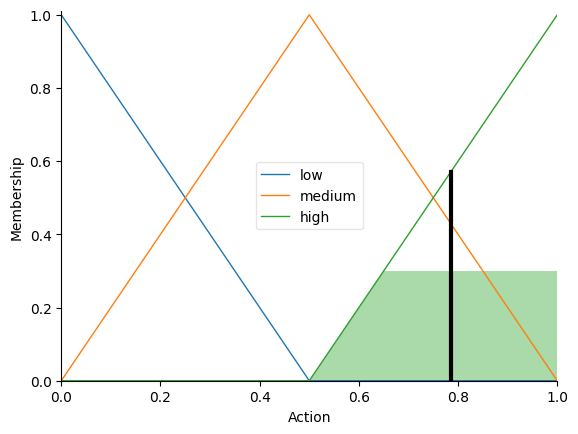

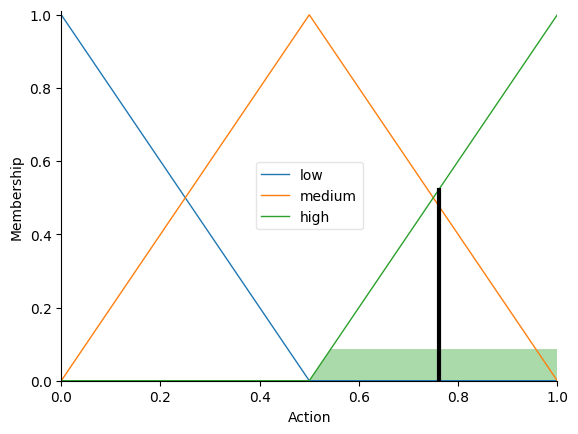

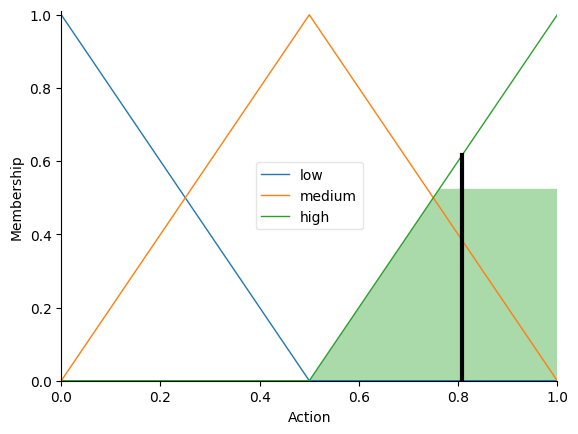

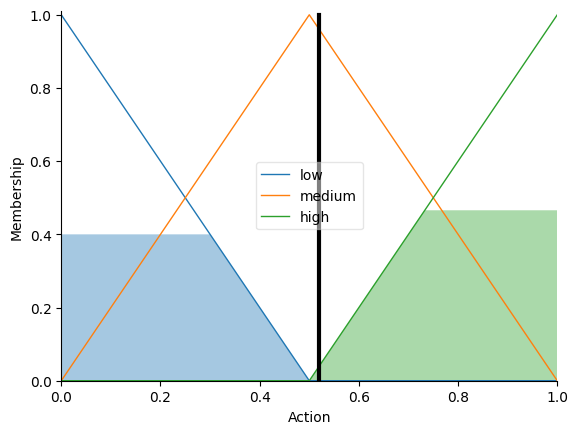

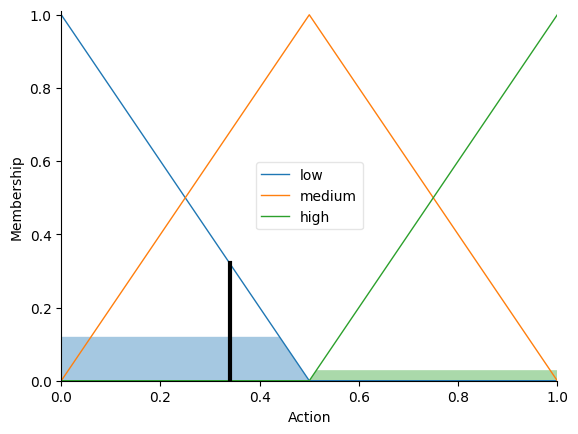

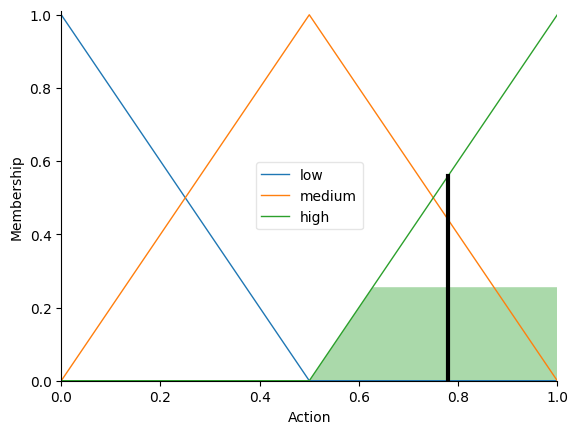

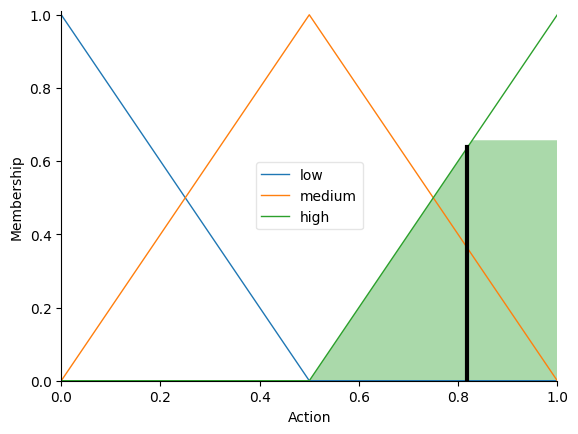

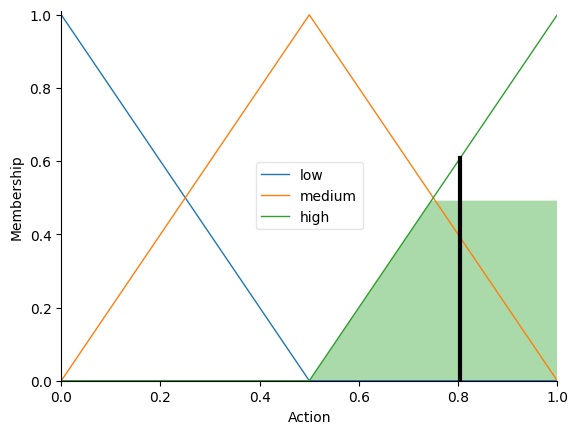

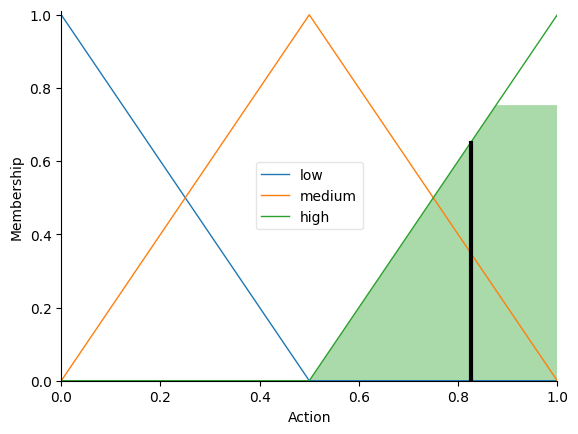

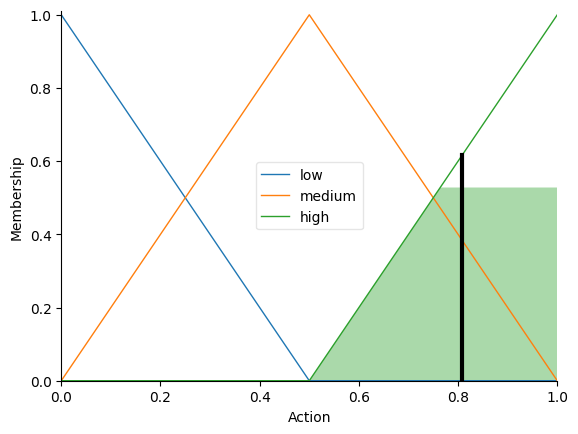

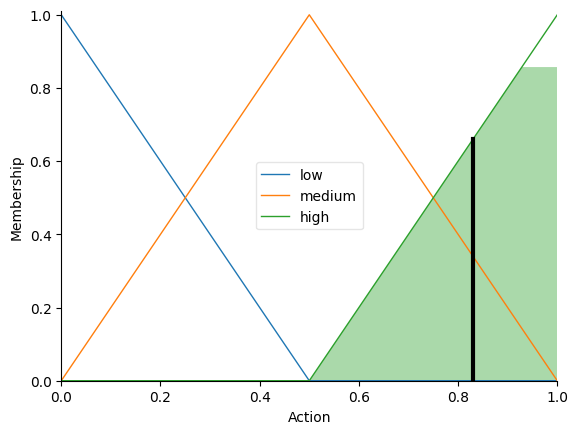

In [ ]:
Action_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
Actioned = ctrl.ControlSystemSimulation(Action_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
#NIF_inputs = [24,30,23,26,18,22,10,60]
#RSBI_inputs = [80,34,96.67,166.04,86.49,85.71,90.63,24.62]


NIF_inputs =  df.NIF.abs().values
RSBI_inputs = df.RSBI.values
Outputs_confusion = []

for index, value in enumerate(NIF_inputs):

  Actioned.input['NIF'] = value 
  Actioned.input['RSBI'] = RSBI_inputs[index]
  Actioned.compute()
  Outputs_confusion.append(Actioned.output['Action'])
  print (Actioned.output['Action'])

# Crunch the numbers
  Action.view(sim=Actioned)

Acurácia:  0.7666666666666667
Precisão:  0.7
Recall:  0.9333333333333333
F1:  0.8


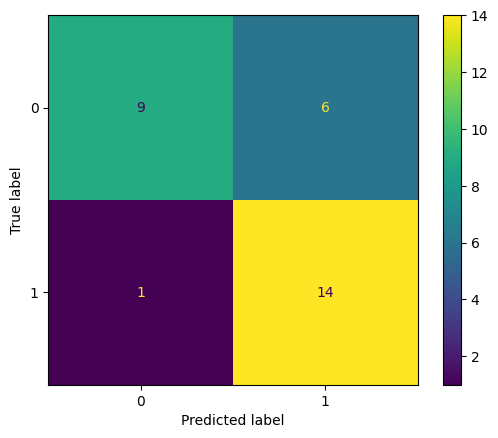

In [ ]:
#Matriz confusão
Binario = []
for value in Outputs_confusion :
  
  if value > 0.5:
    Binario.append(1)
  else :
    Binario.append(0)


y_val = df['C'].apply(lambda x : 1 if x == 'S' else 0)


cm = confusion_matrix(y_val, Binario)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print('Acurácia: ', metrics.accuracy_score(y_val, Binario))
print('Precisão: ', metrics.precision_score(y_val, Binario))
print('Recall: ', metrics.recall_score(y_val, Binario))
print('F1: ', metrics.f1_score(y_val, Binario))
